## **Imports**

In [3]:
using Gen, Distributions, Base64, JSON, Luxor, Plots, GLM

include("./src/inverse-planning/geometric_primitives.jl");
include("./src/inverse-planning/scene.jl");
include("./src/inverse-planning/viz.jl");
include("./src/inverse-planning/planning.jl");
include("./src/utils.jl");
include("./src/read_data.jl");
include("./src/agents/simple_agent_1.jl");

repo_path = readdata_get_gen_quickstart_repo_path()

"M:\\MyFiles\\Classes\\Grad\\Cognitive Science Project\\gen\\gen-quickstart"

In [ ]:
] add https://github.com/diegozea/ROC.jl


In [7]:
# Pkg.add("Serialization")

   Resolving package versions...
    Updating `M:\MyFiles\Classes\Grad\Cognitive Science Project\CCS_Project\Project.toml`
  [9e88b42a] + Serialization
  No Changes to `M:\MyFiles\Classes\Grad\Cognitive Science Project\CCS_Project\Manifest.toml`


## **Load data**

room: 82
pair: 75-76
Getting file:memory_2.1.3.json
Json length:10 | #Runs should be (n-2)/2 = 4.0
scene size: 450 450
--- Map | Level: 1 Dist: teach
        | Fol: forall object is_big(object) then touch(object)
        | NatLang: Touch all objects that are big.
---------
--- Role: TEACHER | Done:true
--- Feedback: My partner did super well ! They were able to understand and execute it with only one teaching lesson. I think these instructions were less confusing for the both of us to teach and understand.
--- New signs count 0
--- Old sign keys: String[]
---------
--- Role: STUDENT | Done:true
--- Feedback: Just using map. Nothing confusing, Good job, Not that I can think of
Guess: Again it was a simple one
--- New signs count 0
--- Old sign keys: String[]
---------


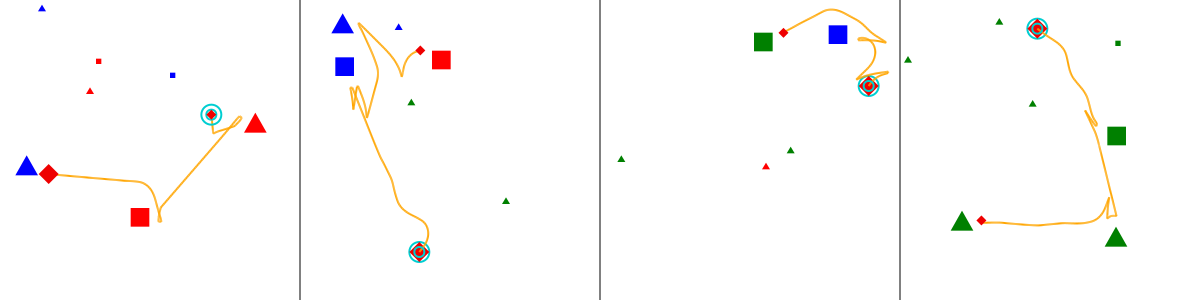

In [3]:
tasknum   = 3
roomnum   = "82"
all_rooms = ["58", "59", "61", "68", "69", "70", "71", "72", "76", "79", "81", "82", "83"];

viz, data  = visualize_memory(roomnum=roomnum, tasknum=tasknum);
playerdata = readdata_get_playerdata_from_task(data, 1, VERBOSE=false);
scene      = utils_scene_from_playerdata(playerdata, VERBOSE=false)

viz

In [10]:
import Serialization
labels_loaded = Serialization.deserialize("data/0_labels_5") # LOAD!

for k in keys(labels_loaded)
    if length(labels_loaded[k]) == 0
        continue
    end
    display(k)
    display(labels_loaded[k])
end

println("Positive:")
pos_count = 0
for rk in keys(labels_loaded)
    count = length([1 for l in keys(labels_loaded[rk]) if length(labels_loaded[rk][l])>0])
    count>0 && print(rk, ":", count, " - ")
    pos_count += count
end

println("\nTotal: ", pos_count)
println("\nNegative:")

neg_count = 0
for rk in keys(labels_loaded)
    count = length([1 for l in keys(labels_loaded[rk]) if length(labels_loaded[rk][l])==0])
    count>0 && print(rk, ":", count, " - ")
    neg_count += count
end
println("\nTotal: ", neg_count)

"58"

Dict{Any, Any} with 5 entries:
  "1_1" => Any[]
  "3_1" => Any[]
  "5_1" => Any[]
  "4_1" => Any[]
  "2_1" => Any[]

"83"

Dict{Any, Any} with 21 entries:
  "14_6" => [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
  "12_1" => [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
  "25_1" => [33, 34, 35, 36, 37, 38, 39, 40, 41, 42  …  46, 47, 48, 49, 50, 51,…
  "2_1"  => Any[]
  "18_1" => Any[]
  "8_1"  => [65, 66, 67, 68, 69, 70, 71, 72, 73, 74  …  79, 80, 81, 82, 83, 84,…
  "3_1"  => Any[]
  "5_1"  => [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
  "26_1" => [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45…
  "4_1"  => Any[]
  "16_9" => [27, 28, 29, 30, 31, 32, 33, 34, 35, 36  …  45, 46, 47, 48, 49, 50,…
  "9_1"  => Any[]
  "17_1" => Any[]
  "1_1"  => Any[]
  "6_1"  => Any[]
  "7_1"  => [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
  "10_1" => Any[]
  "5_3"  => [29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45…
  "18_7" => [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
  "18_5" => [31, 32, 33, 34, 35, 36, 37, 38, 39, 40  …  49, 50, 

"70"

Dict{Any, Any} with 9 entries:
  "8_9"  => [12, 13, 14, 15, 16, 17, 18]
  "9_1"  => [26, 27, 28, 29, 30, 31, 32, 33, 34, 35  …  47, 48, 49, 50, 51, 52,…
  "12_1" => [10, 11, 12, 13, 14, 15, 16, 17, 18, 19  …  91, 92, 93, 94, 95, 96,…
  "6_7"  => [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,…
  "8_14" => [4, 5, 6, 7, 8, 9, 10, 11, 12, 13  …  38, 39, 40, 41, 42, 43, 44, 4…
  "7_3"  => [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
  "13_1" => [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
  "2_1"  => Any[]
  "6_3"  => [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

"69"

Dict{Any, Any} with 7 entries:
  "9_1" => Any[]
  "1_1" => Any[]
  "7_1" => Any[]
  "3_1" => Any[]
  "5_1" => Any[]
  "4_1" => Any[]
  "2_1" => Any[]

Positive:
83:12 - 70:8 - 
Total: 20

Negative:
58:5 - 83:9 - 70:1 - 69:7 - 
Total: 22


## **Generative model**

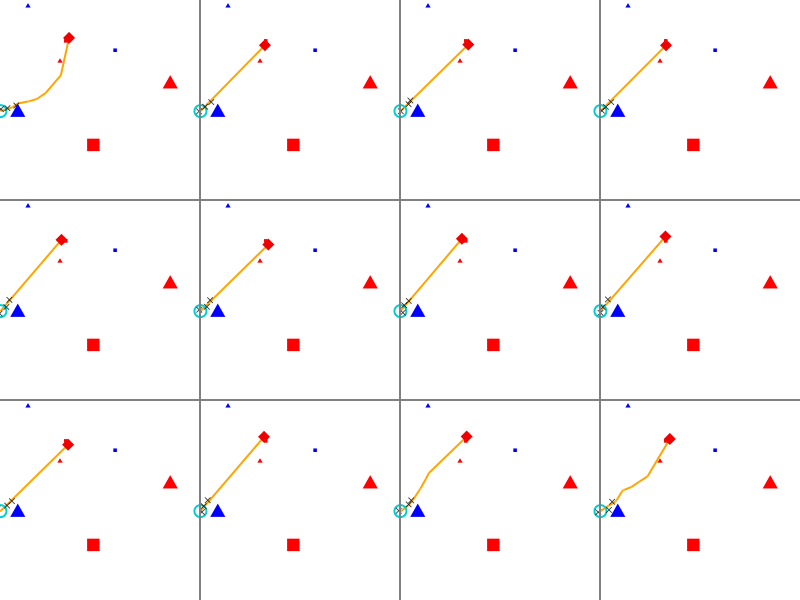

In [5]:
num_ticks      = 3;
dt             = 1/(num_ticks);
planner_params = PlannerParams(rrt_iters=200, rrt_dt=10.0, refine_iters=1000, refine_std=5.);
agent_args     = simpleagent1_make_args(scene, dt, num_ticks, planner_params; noise=3.0, angle_beta=1.0, pre_comp_rrt=nothing);

constraints = Gen.choicemap();
constraints[:start_x] = 1;
constraints[:start_y] = 200;
constraints[:dest_shape] = 4;
constraints[:speed] = 50;

traces = [Gen.generate(simpleagent1_model, (agent_args, ), constraints)[1] for i in 1:12];

visualize_grid(traces, 4, 800; separators="gray") do trace, frame
    draw_trace(trace, frame; draw_measurements=true, markersize=6)
end

## **Inference**

In [6]:
function run_model(scene, trajectory)
    
    # Agent parameters
    num_ticks       = 3;
    dt              = 1/num_ticks;
    planner_params  = PlannerParams(rrt_iters=200, rrt_dt=10.0, refine_iters=1000, refine_std=5.);
    #agent_args      = simpleagent1_make_args(scene, dt, num_ticks, planner_params; noise=3.0, angle_beta=2.0, pre_comp_rrt=nothing);
    samples         = 50;
    computation_amt = 250;
    
    # Lists for results
    path_complexity = zeros(length(trajectory)-(num_ticks-1), 1);
    target_distribution = zeros(length(trajectory)-(num_ticks-1), length(scene.obstacles));
    target_mean_distance = zeros(length(trajectory)-(num_ticks-1), 1);
    trace_score = zeros(length(trajectory)-(num_ticks-1), 1);
    
    # 
    pre_comp_rrt_vector = [[generate_rrt(scene, start, planner_params.rrt_iters, planner_params.rrt_dt) for _ in 1:50] for start in trajectory]
    
    counter = nothing 
    
    for i = 1:length(trajectory)-(num_ticks-1)
        
        measuremene = trajectory[i:i+num_ticks-1]
        path_complexity[i,1] = 1 - path_linearity(measuremene)
        
        agent_args = simpleagent1_make_args(scene, dt, num_ticks, planner_params; noise=3.0, angle_beta=2.0, pre_comp_rrt=pre_comp_rrt_vector[i])
        
        # Counter if planning failed
        counter = 0
        
        for j in 1:samples
            
            trace = do_inference(agent_args, measuremene[1], measuremene, computation_amt)
            planning_failed = Gen.get_retval(trace)[:planning_failed]
            
            if planning_failed
                continue
            end
            
            counter += 1
            
            #display(trace[:speed])
            
            trace_score[i, 1] += get_score(trace)
            target_distribution[i, trace[:dest_shape]] += 1
            target_mean_distance[i, 1] += euclidean_distance_obstacle_point(scene.obstacles[trace[:dest_shape]], 
                                                                            measuremene[end][1], 
                                                                            measuremene[end][2])/samples
        end;
        
    end;
    
    results = Dict("target_distribution" => target_distribution/counter, 
                   "target_mean_distance" => target_mean_distance/counter,
                   "trace_score" => trace_score/counter,
                   "path_complexity" => path_complexity/counter,
                   "planning_failed" => (counter-samples)/(samples))
    
    return results
    
end;

function do_inference(agent_args::Dict, start::Point, 
                      measurements::Vector{Point}, 
                      amount_of_computation::Int)

    # Constrain the observed measurements
    observations = Gen.choicemap()
    observations[:start_x] = start.x
    observations[:start_y] = start.y
    for (i, m) in enumerate(measurements)
        observations[:meas => (i, :x)] = m.x
        observations[:meas => (i, :y)] = m.y
    end

    (trace, _) = importance_resampling(simpleagent1_model, (agent_args, ), observations, amount_of_computation)

    return trace
end;


function block_resimulation_update(trace)
    
    (trace,b3) = mh(trace, Gen.select(:dest_shape))

    for i=1:10
        (trace,b1) = mh(trace, Gen.select(:dest_angle))
        (trace,b2) = mh(trace, Gen.select(:speed)) 
    end

    return trace
    
end;


function do_inference_mh(agent_args::Dict, start::Point, 
                         measurements::Vector{Point},
                         amount_of_computation::Int)
    
    amount_of_computation = Integer(amount_of_computation/20)
    
    # Constrain the observed measurements.
    observations = Gen.choicemap()
    observations[:start_x] = start.x
    observations[:start_y] = start.y
    for (i, m) in enumerate(measurements)
        observations[:meas => (i, :x)] = m.x
        observations[:meas => (i, :y)] = m.y
    end

    (trace, _) = Gen.generate(simpleagent1_model, (agent_args,), observations)

    for iter=1:amount_of_computation
        trace = block_resimulation_update(trace)
    end

    return trace;
    
end;

function get_scene_trajectory(roomnum, tasknum, runno)
    
    label_key = string(tasknum)*"_"*string(runno)
    x = tasknum <= 40 ? "2" : "4"
    y = string((tasknum-1) % 40 + 1)
    file_name = "memory_"*x*".1."*y*".json"
    room = readdata_get_comm_game_path() * "/python_scripts/visualize/pairs_data/room0000"*roomnum
    dict1 = readdata_get_task_from_room(room, file_name, VERBOSE=false);
    
    playerdata1 = readdata_get_playerdata_from_task(dict1, 2*runno - 1, VERBOSE=false);
    playerdata2 = readdata_get_playerdata_from_task(dict1, 2*runno, VERBOSE=false);
    scene = utils_scene_from_playerdata(playerdata1, VERBOSE=false)
    
    if playerdata1["role"] == "STUDENT"  # Make player1 always teacher
        playerdata1, playerdata2 = playerdata2, playerdata1
    end
    player_trajectory1 = [Point(x, y) for (x, y) in zip(playerdata1["x"], playerdata1["y"])]
    player_trajectory2 = [Point(x, y) for (x, y) in zip(playerdata2["x"], playerdata2["y"])]
    
    trajectory = utils_strip_trajectory(player_trajectory1; epsilon=20)
    
    return scene, trajectory
    
end;

function euclidean_distance(p1::Point, p2::Point)
    l2 = sqrt((p1.x - p2.x)^2 + (p1.y - p2.y)^2)
    return l2
end;

function euclidean_distance_obstacle_point(obstacle, x, y)
    
    xs = [i.x for i in obstacle.vertices]
    ys = [i.y for i in obstacle.vertices]
    midx, midy = sum(xs)/length(xs), sum(ys)/length(ys)
    dist = sqrt((x-midx)^2 + (y-midy)^2)
    
    return dist
end;

function path_length(path::Array{Point, 1}, closed=false)
    l = 0.0
    for i in 1:length(path) - 1
        l += euclidean_distance(path[i], path[i+1])
    end
    if closed
        l += euclidean_distance(path[end], path[1])
    end
    return l
end;

function path_linearity(path::Array{Point, 1})
    len  = path_length(path)
    path = path ./ len
    xc = sum([i.x for i in path])/length(path)
    yc = sum([i.y for i in path])/length(path)
    centroid = Point(xc, yc)
    linearity = euclidean_distance(path[1], centroid) + euclidean_distance(path[end], centroid)
    linearity = clamp.(linearity, 0, Inf)
    return linearity
end;

In [7]:
rooms_list = ["83"];
results_list = Dict()

for room in rooms_list
    
    results_list[room] = Dict()
    
    for data in labels_loaded[room]
        
        # Get scene and trajectory
        tasknum = parse(Int64, split(data[1], "_")[1])
        runno = parse(Int64, split(data[1], "_")[2])
        label = data[2]
        scene, trajectory = get_scene_trajectory(room, tasknum, runno);
        
        display(data[1])
        
        # Run model
        results = run_model(scene, trajectory);
        
        # Store results
        results_list[room][data[1]] = results;
        
    end
    
end

# Serialization.serialize("results/0_results_3", results_list)  # SAVE!

"14_6"

"12_1"

"25_1"

"2_1"

"18_1"

"8_1"

"3_1"

"5_1"

"26_1"

"4_1"

"16_9"

"9_1"

"17_1"

"1_1"

"6_1"

"7_1"

"10_1"

"5_3"

"18_7"

"18_5"

"16_4"

In [8]:
labels_loaded["83"]["25_1"]

23-element Vector{Int64}:
 33
 34
 35
 36
 37
 38
 39
 40
 41
 42
 43
 44
 45
 46
 47
 48
 49
 50
 51
 52
 53
 54
 55

In [9]:
results_list["83"]["25_1"]

Dict{String, Any} with 5 entries:
  "planning_failed"      => 0.0
  "trace_score"          => [-34.0446; -47.5903; … ; -33.7486; -38.8851;;]
  "target_mean_distance" => [2.73706; 5.5929; … ; 2.20821; 2.13571;;]
  "path_complexity"      => [5.99314e-5; 0.00946823; … ; 0.000520179; 3.46038e-…
  "target_distribution"  => [0.0 0.12 … 0.02 0.0; 0.02 0.06 … 0.12 0.04; … ; 0.…

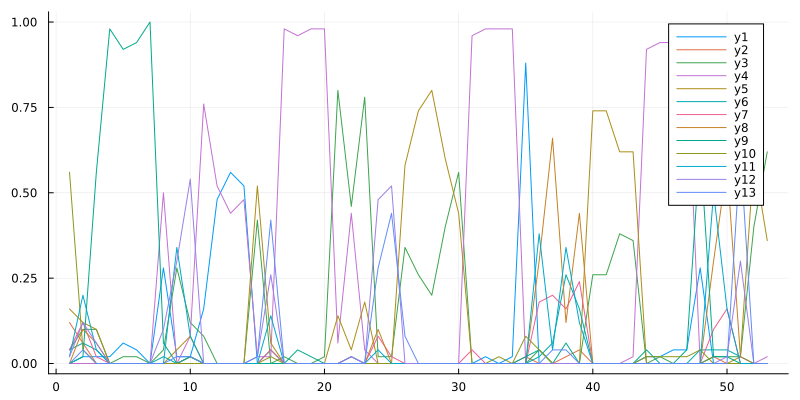

In [10]:
plot(results_list["83"]["25_1"]["target_distribution"])
plot!(size=(800,400))

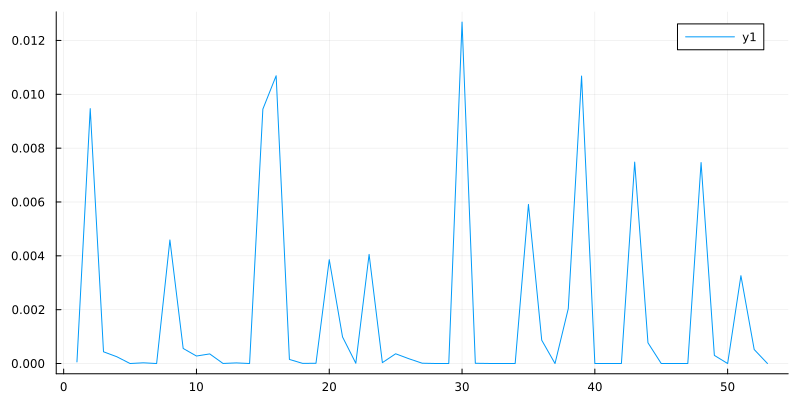

In [11]:
plot(results_list["83"]["25_1"]["path_complexity"])
plot!(size=(800,400))

In [230]:
function get_window_min(m; window_half_len = 2)
    m_min = zeros(size(m))
    for j in 1:size(m, 2)
        for i in 1:size(m, 1)
            window = (i-window_half_len, i+window_half_len)
            window = (max(window[1], 1), min(window[2], size(m, 1)))
            window_elem = m[window[1]:window[2], j]
            if any([isnothing(i) for i in window_elem])
                window_elem = [i for i in window_elem if !isnothing(i)]  # remove nothing
                println(i, " ", j)
            end
            m_min[i, j] = length(window_elem)>0 ? minimum(window_elem) : 0
            # m_min[i, j] = minimum(window_elem)
        end
    end
    return m_min
end
function get_window_max(m; window_half_len = 2)
    m_min = zeros(size(m))
    for j in 1:size(m, 2)
        for i in 1:size(m, 1)
            window = (i-window_half_len, i+window_half_len)
            window = (max(window[1], 1), min(window[2], size(m, 1)))
            window_elem = m[window[1]:window[2], j]
            if any([isnothing(i) for i in window_elem])
                window_elem = [i for i in window_elem if !isnothing(i)]  # remove nothing
                println(i, " ", j)
            end
            m_min[i, j] = length(window_elem)>0 ? maximum(window_elem) : 0
            # m_min[i, j] = minimum(window_elem)
        end
    end
    return m_min
end
function get_window_mean(m; window_half_len = 2)
    m_min = zeros(size(m))
    for j in 1:size(m, 2)
        for i in 1:size(m, 1)
            window = (i-window_half_len, i+window_half_len)
            window = (max(window[1], 1), min(window[2], size(m, 1)))
            window_elem = m[window[1]:window[2], j]
            if any([isnothing(i) for i in window_elem])
                window_elem = [i for i in window_elem if !isnothing(i)]  # remove nothing
                println(i, " ", j)
            end
            m_min[i, j] = length(window_elem)>0 ? mean(window_elem) : 0
            # m_min[i, j] = minimum(window_elem)
        end
    end
    return m_min
end
# get_window_min(m; window_half_len=1);
# m

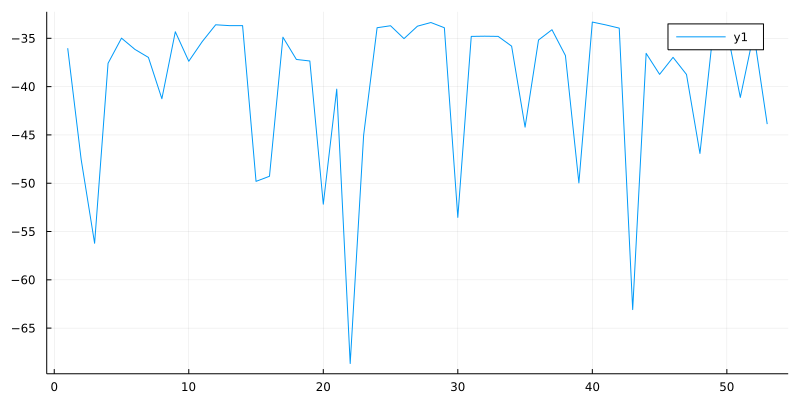

In [341]:
plot(results_list["83"]["25_1"]["trace_score"])
plot!(size=(800,400))

Dict{String, Dict{Any, Any}} with 13 entries:
  "81" => Dict()
  "72" => Dict()
  "79" => Dict()
  "58" => Dict("1_1"=>Any[], "3_1"=>Any[], "5_1"=>Any[], "4_1"=>Any[], "2_1"=>A…
  "83" => Dict("14_6"=>[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]…
  "68" => Dict()
  "76" => Dict()
  "59" => Dict()
  "61" => Dict()
  "71" => Dict()
  "70" => Dict("8_9"=>[12, 13, 14, 15, 16, 17, 18], "9_1"=>[26, 27, 28, 29, 30,…
  "69" => Dict("9_1"=>Any[], "1_1"=>Any[], "7_1"=>Any[], "3_1"=>Any[], "5_1"=>A…
  "82" => Dict()

In [124]:
function remove_elements(lst::Array{Int64,1}, num::Int64)
    # Create an empty result list
    result = []
    
    # Iterate over the elements in the input list
    for elt in lst
        # If the element is smaller than or equal to the given number, add it to the result list
        if elt <= num
            push!(result, elt)
        end
    end
    
    # Return the result list
    return result
end;

# load data

In [105]:
import Serialization
labels_loaded = Serialization.deserialize("data/0_labels_6") # LOAD!

using JLD
results_list = JLD.load("results/0_results_4.jld")["results_list"]
rooms_list = [i for i in keys(results_list)]

for room in rooms_list
    for data in keys(results_list[room])
        # replace_nan(results_list[room][data]["target_distribution"])
        # replace_nan(results_list[room][data]["trace_score"])
        # replace_nan(results_list[room][data]["target_mean_distance"])
        # replace_nan(results_list[room][data]["path_complexity"])
    end
end



In [7]:

# reduce(hcat, results_list["83"]["5_1"]["target_distribution"])
results_list["83"]["5_1"]

Dict{String, Any} with 6 entries:
  "planning_failed"      => 0.0
  "trace_score"          => [-33.0517; -32.2455; … ; -44.2676; -33.1299;;]
  "planning_outlier"     => 0.0333333
  "target_mean_distance" => [229.641; 149.086; … ; 41.9845; 28.4561;;]
  "path_complexity"      => [0.0267143; 2.79429e-5; … ; 0.152471; 0.000452917;;]
  "target_distribution"  => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 1.0 …

In [40]:
function replace_nan(x; v=0)
    # println(x)
    for i in 1:size(x, 1)
        for j in 1:size(x, 2)
            # println(i, " ", j)
            if isnan(x[i,j])
                x[i,j] = v
            end
        end
    end
end

replace_nan (generic function with 1 method)

In [320]:

y  = []
x1 = []
x2 = []
x3 = []
x4 = []
full_feats = []

for room in rooms_list
    
    for data in keys(labels_loaded[room])
        
        # Get labels
        tasknum = parse(Int64, split(data, "_")[1])
        runno   = parse(Int64, split(data, "_")[2])
        labels  = labels_loaded[room][data]

        # Get results
        results = results_list[room][data]

        # println(results["target_distribution"])
        # replace_nan(results["target_distribution"])
        # replace_nan(results["trace_score"])
        # replace_nan(results["target_mean_distance"])
        # replace_nan(results["path_complexity"])
        # println("---", data)
        xtmp6 = total_variation_distance(results["target_distribution"])
        # break

        
        for i = 1:length(results["trace_score"])
            feats = []

            push!(feats, results["trace_score"][i,1])
            push!(feats, results["target_mean_distance"][i,1])
            push!(feats, results["path_complexity"][i,1])
            
            if length(results["target_distribution"][i,:]) > 1
                push!(feats, entropy(results["target_distribution"][i,:], length(results["target_distribution"][i,:])))
            else
                push!(feats, entropy(results["target_distribution"][i,:]))
            end
            push!(feats, xtmp6[i,1])

            for wi = [1, 4, 8, 12]
                push!(feats, maximum(get_window_max(results["target_distribution"]; window_half_len=wi)[i,:]))
                push!(feats, maximum(get_window_min(results["target_distribution"]; window_half_len=wi)[i,:]))
                push!(feats, minimum(get_window_mean(results["target_distribution"]; window_half_len=wi)[i,:]))
                push!(feats, get_window_min(results["trace_score"]; window_half_len=wi)[i,1])
                push!(feats, get_window_max(results["trace_score"]; window_half_len=wi)[i,1])
                push!(feats, get_window_mean(results["trace_score"]; window_half_len=wi)[i,1])
                push!(feats, get_window_max(results["path_complexity"]; window_half_len=wi)[i,1])
                push!(feats, get_window_mean(results["path_complexity"]; window_half_len=wi)[i,1])
                push!(feats, get_window_min(results["path_complexity"]; window_half_len=wi)[i,1])
            end

            push!(full_feats, feats)
            if i in labels
                push!(y, 1)
            else
                push!(y, 0)
            end
            
        end
    end
end

full_feats = permutedims(hcat(full_feats...))
# println(size(full_feats))
# X = cat(full_feats, dims=2);
X = Array{Float64}(full_feats);
y = Array{Float64}(y);

In [179]:
# cor(x2, y)

In [212]:
a = randn(30, 30)
b = (a[:,1]./20) .+ 1/2;
# println(b)
# glm(a, b, Binomial(), ProbitLink())


In [321]:
logit = glm(X, y, Binomial(), ProbitLink())
display(logit)
y_hat = predict(logit, X);
y_hat

import ROC
println("ROC:", ROC.AUC(ROC.roc(y_hat, y, true)))
println("CORR:", cor(y_hat, y))


GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}:

Coefficients:
─────────────────────────────────────────────────────────────────────────────────
              Coef.    Std. Error      z  Pr(>|z|)       Lower 95%      Upper 95%
─────────────────────────────────────────────────────────────────────────────────
x1      0.00165097    0.000763476   2.16    0.0306     0.000154584    0.00314735
x2      0.00150266    0.000460429   3.26    0.0011     0.000600235    0.00240508
x3     -0.66779       0.273455     -2.44    0.0146    -1.20375       -0.131828
x4      0.0974973     0.196068      0.50    0.6190    -0.286788       0.481783
x5      0.346933      0.147728      2.35    0.0189     0.0573914      0.636475
x6      0.149171      0.334389      0.45    0.6555    -0.506219       0.804562
x7     -0.412149      0.152307     -2.71    0.0068    -0.710666      -0.113632
x8     -0.50

ROC:0.8639518413597833
CORR:0.5923501171386809


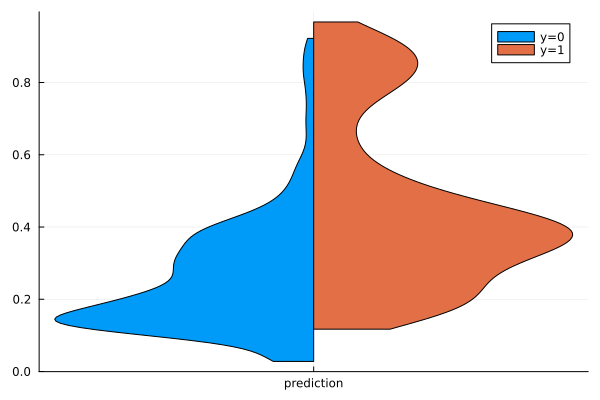

In [314]:
# StatsPlots.violin(y_hat, y,side=:left)
# StatsPlots.violin([1],y_hat,side=:left)
v1 = y_hat[[i==0 for i in y]]
v2 = y_hat[[i==1 for i in y]]
# StatsPlots.violin(["0", "1"], [v1, v2])
length(v1)
length(v2)
StatsPlots.violin(["prediction"], v1, label="y=0", side=:left)
StatsPlots.violin!(["prediction"], v2, label="y=1", side=:right)
# StatsPlots.boxplot(["y=0"], v1)
# StatsPlots.boxplot!(["y=1"], v2)
StatsPlots.current()
# StatsPlots.clear()


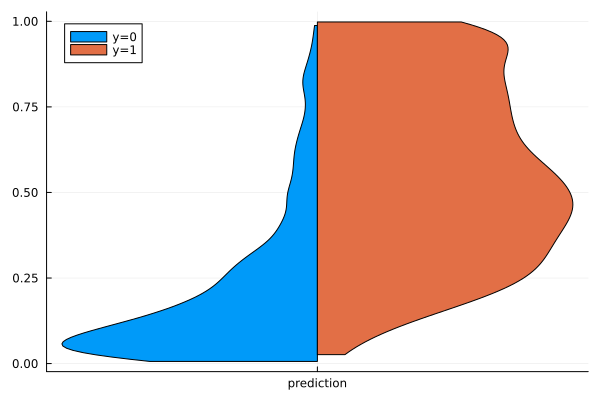

In [322]:
# StatsPlots.violin(y_hat, y,side=:left)
# StatsPlots.violin([1],y_hat,side=:left)
v1 = y_hat[[i==0 for i in y]]
v2 = y_hat[[i==1 for i in y]]
# StatsPlots.violin(["0", "1"], [v1, v2])
length(v1)
length(v2)
StatsPlots.violin(["prediction"], v1, label="y=0", side=:left)
StatsPlots.violin!(["prediction"], v2, label="y=1", side=:right)
# StatsPlots.boxplot(["y=0"], v1)
# StatsPlots.boxplot!(["y=1"], v2)
StatsPlots.current()
# StatsPlots.clear()


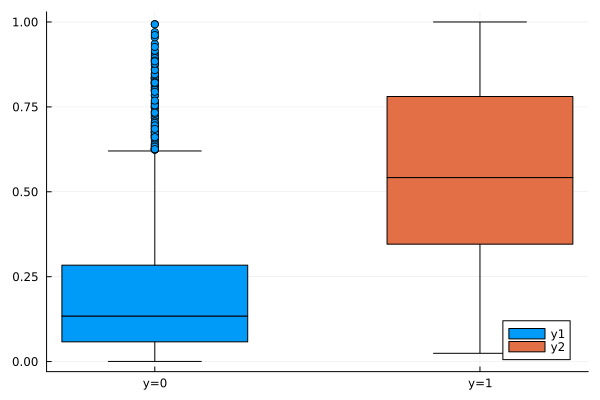

In [323]:
# StatsPlots.violin(y_hat, y,side=:left)
# StatsPlots.violin([1],y_hat,side=:left)
v1 = y_hat[[i==0 for i in y]]
v2 = y_hat[[i==1 for i in y]]
# StatsPlots.violin(["0", "1"], [v1, v2])
length(v1)
length(v2)
# StatsPlots.violin(["prediction"], v1, label="y=0", side=:left)
# StatsPlots.violin!(["prediction"], v2, label="y=1", side=:right)
StatsPlots.boxplot(["y=0"], v1)
StatsPlots.boxplot!(["y=1"], v2)
StatsPlots.current()
# StatsPlots.clear()


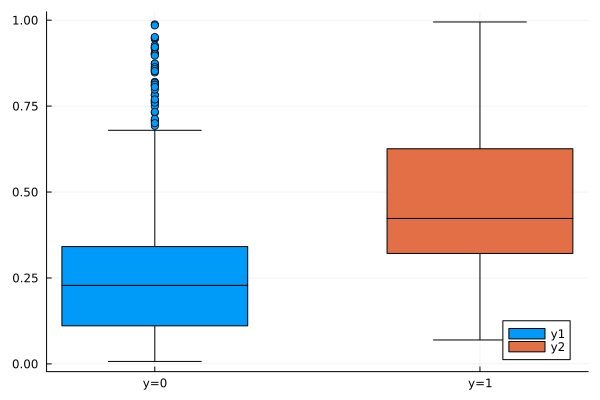

In [319]:
# StatsPlots.violin(y_hat, y,side=:left)
# StatsPlots.violin([1],y_hat,side=:left)
v1 = y_hat[[i==0 for i in y]]
v2 = y_hat[[i==1 for i in y]]
# StatsPlots.violin(["0", "1"], [v1, v2])
length(v1)
length(v2)
# StatsPlots.violin(["prediction"], v1, label="y=0", side=:left)
# StatsPlots.violin!(["prediction"], v2, label="y=1", side=:right)
StatsPlots.boxplot(["y=0"], v1)
StatsPlots.boxplot!(["y=1"], v2)
StatsPlots.current()
# StatsPlots.clear()


In [1]:
import StatsPlots
# import Pkg; Pkg.add("StatsPlots")


┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1423


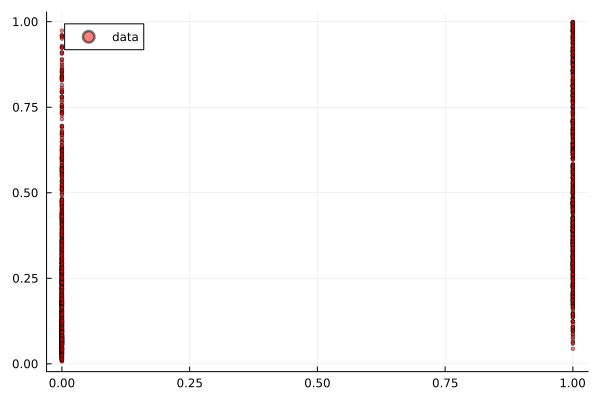

In [246]:
scatter(y, y_hat, label="data", mc=:red, ms=2, ma=0.5)

In [252]:
xx = []
yy = []

for room in rooms_list
    
    index = 1
    
    for data in keys(labels_loaded[room])
        
        # Get labels
        tasknum = parse(Int64, split(data, "_")[1])
        runno   = parse(Int64, split(data, "_")[2])
        labels  = labels_loaded[room][data]
        
        # display(data)
        
        # Get results
        results = results_list[room][data]
        
        wind_len = length(results["trace_score"])
        slice = y_hat[index:index+wind_len-1]
        
        if length(labels) == 0
            push!(yy, 0)
            y_hat_sum  = mean(slice)
            push!(xx, y_hat_sum)
        else
            push!(yy, 1)
            labels = remove_elements(labels, wind_len)
            y_hat_sum  = mean(slice[labels])
            push!(xx, y_hat_sum)
        end
        
        index += wind_len
        
    end  
end

In [248]:
xx

52-element Vector{Any}:
  4.77123857595924
  2.748419702187224
  3.2116901667316022
  2.9617362063763193
  6.817915261760072
  0.7784539347814099
  4.767268567687913
  1.8506739451653225
  7.451929913956172
 12.182811543329283
 10.582904634789093
  5.576296577694048
  2.75447552827551
  ⋮
  7.900263005974168
  4.202770075875556
  3.0134552223719564
 31.634734004476904
  3.326354617388064
  2.3922029763497075
  4.6687799633803175
  0.7954329600447756
  4.293915597580271
  2.8187222816787187
 20.86529902664093
  3.9254068893160676

In [249]:
cor(xx, yy)

-0.08105777839113548

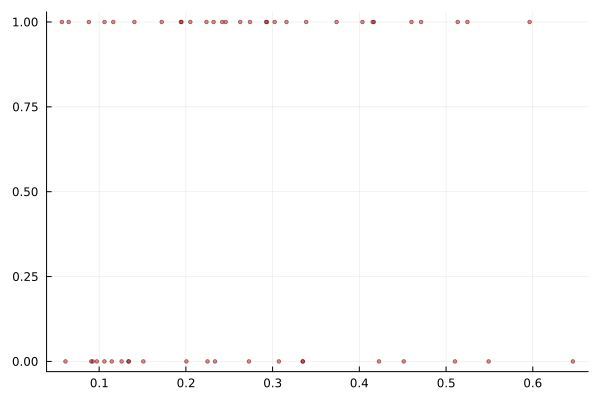

In [253]:
scatter(xx, yy, label=nothing, mc=:red, ms=2, ma=0.5)

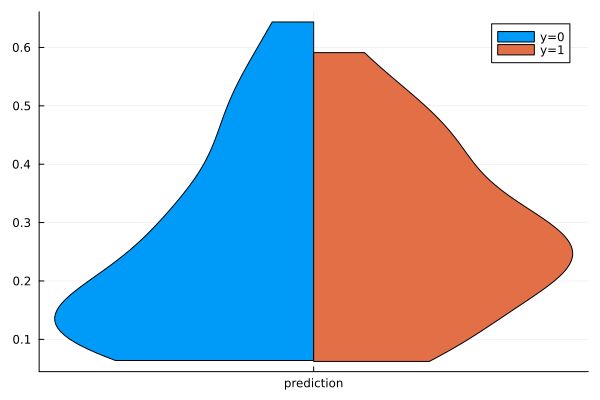

In [254]:
# StatsPlots.violin(y_hat, y,side=:left)
# StatsPlots.violin([1],y_hat,side=:left)
v1 = xx[[i==0 for i in yy]]
v2 = xx[[i==1 for i in yy]]
# StatsPlots.violin(["0", "1"], [v1, v2])
length(v1)
length(v2)
StatsPlots.violin(["prediction"], v1, label="y=0", side=:left)
StatsPlots.violin!(["prediction"], v2, label="y=1", side=:right)
StatsPlots.current()
# StatsPlots.clear()


In [184]:
######

function moving_average(A::AbstractArray, m::Int)
    out = similar(A)
    R = CartesianIndices(A)
    Ifirst, Ilast = first(R), last(R)
    I1 = m÷2 * oneunit(Ifirst)
    for I in R
        n, s = 0, zero(eltype(out))
        for J in max(Ifirst, I-I1):min(Ilast, I+I1)
            s += A[J]
            n += 1
        end
        out[I] = s/n
    end
    return out
end;

function total_variation_distance(target_distribution)
    
    diff = target_distribution[1:size(target_distribution)[1]-1,:] - target_distribution[2:end,:]
    total_variation = abs.(diff)
    total_variation = sum(total_variation, dims=2)/2
    total_variation = vcat(total_variation, [0])
    
    return total_variation
    
end;

function euclidean_distance_obstacle_point(obstacle, x, y)
    
    xs = [i.x for i in obstacle.vertices]
    ys = [i.y for i in obstacle.vertices]
    midx, midy = sum(xs)/length(xs), sum(ys)/length(ys)
    dist = sqrt((x-midx)^2 + (y-midy)^2)
    
    return dist
end;

######

function euclidean_distance(p1::Point, p2::Point)
    l2 = sqrt((p1.x - p2.x)^2 + (p1.y - p2.y)^2)
    return l2
end;

function path_length(path::Array{Point, 1}, closed=false)
    l = 0.0
    for i in 1:length(path) - 1
        l += euclidean_distance(path[i], path[i+1])
    end
    if closed
        l += euclidean_distance(path[end], path[1])
    end
    return l
end;

function path_linearity(path::Array{Point, 1})
    len  = path_length(path)
    path = path ./ len
    xc = sum([i.x for i in path])/length(path)
    yc = sum([i.y for i in path])/length(path)
    centroid = Point(xc, yc)
    linearity = euclidean_distance(path[1], centroid) + euclidean_distance(path[end], centroid)
    linearity = clamp.(linearity, 0, Inf)
    return linearity
end;


######

function entropy_moving_window(distribution_matrix::Array{Float64, 2}, window::Int)

    entropy_array = []
    l = size(distribution_matrix)[1]
    s = size(distribution_matrix)[2]
    
    for i = 1:l
        
        if i < l-window
            slice = distribution_matrix[i:i+window-1,:]
            slice = sum(slice, dims=1)./window
            push!(entropy_array, entropy(slice, s))
        else
            slice = distribution_matrix[i:end,:]
            slice = sum(slice, dims=1)./(l-i+1)
            push!(entropy_array, entropy(slice, s))
        end

    end
    
    entropy_array = clamp.(entropy_array, 0, Inf)
    
    return entropy_array
    
end;


function entropy_moving_window2(distribution_matrix::Array{Float64, 2}, window::Int)

    entropy_array = []
    l = size(distribution_matrix)[1]
    s = size(distribution_matrix)[2]
    
    for i = 1:l
        
        if i > window
            slice = distribution_matrix[i-window:i,:]
            slice = sum(slice, dims=1)./window
            push!(entropy_array, entropy(slice, s))
        else
            slice = distribution_matrix[1:i,:]
            slice = sum(slice, dims=1)./(l-i+1)
            push!(entropy_array, entropy(slice, s))
        end

    end
    
    entropy_array = clamp.(entropy_array, 0, Inf)
    
    return entropy_array
    
end;

35

room: 83
pair: 61-62
Getting file:memory_2.1.5.json
Json length:14 | #Runs should be (n-2)/2 = 6.0
scene size: 450 450
--- Map | Level: 1 Dist: teach
        | Fol: forall object is_triangle(object) then touch(object)
        | NatLang: Touch all objects that are triangular.
---------
--- Role: TEACHER | Done:true
--- Feedback: this time I touch all the triangular shapes but also moved my car to create a triangle shape on the board, perhaps this is also what helped my partner understand the task
--- New signs count 1
   | New sign #1 | Comment: I moved my car in a triangle shape to sign my partner


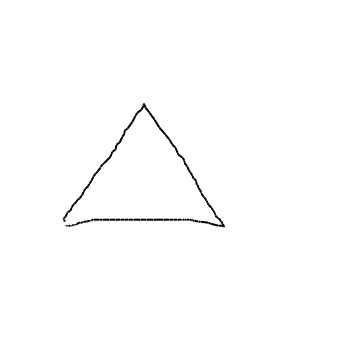

--- Old sign keys: String[]
---------
--- Role: STUDENT | Done:true
--- Feedback: It was confusing the first time to understand what he was showing me between the practice and test maps because the variables change. I think he tried spelling something with his car when we did it the second time but I'm not sure. I learned from trial and error.
Guess: I think the task was to touch all of the triangles.
--- New signs count 0
--- Old sign keys: ["0"]
---------


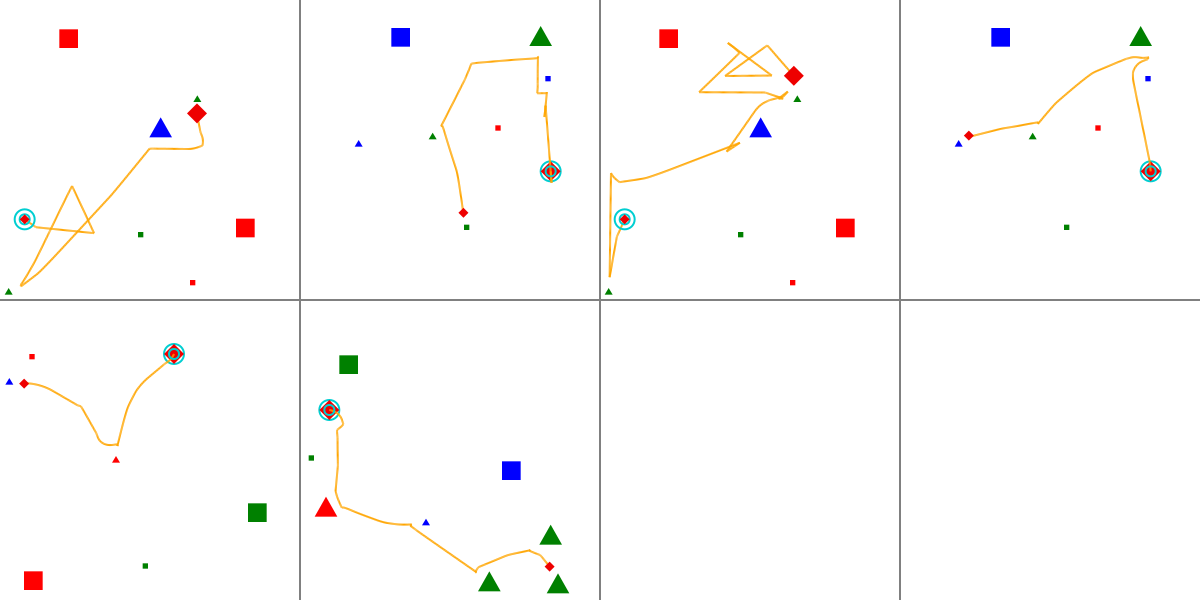

In [76]:
i = 1
tasknum = 5
roomnum = "83"
all_rooms = ["58", "59", "61", "68", "69", "70", "71", "72", "76", "79", "81", "82", "83"];

get_scene_trajectory(roomnum, tasknum, runno)

num_ticks      = 5;
dt             = 1/num_ticks;

planner_params = PlannerParams(rrt_iters=200, rrt_dt=10.0, refine_iters=1000, refine_std=5.);
agent_args     = simpleagent1_make_args(scene, dt, num_ticks, planner_params; noise=3.0, angle_beta=2.0, pre_comp_rrt=nothing);

computation_amt = 100;
samples         = 50;

viz, data  = visualize_memory(roomnum=roomnum, tasknum=tasknum);
viz

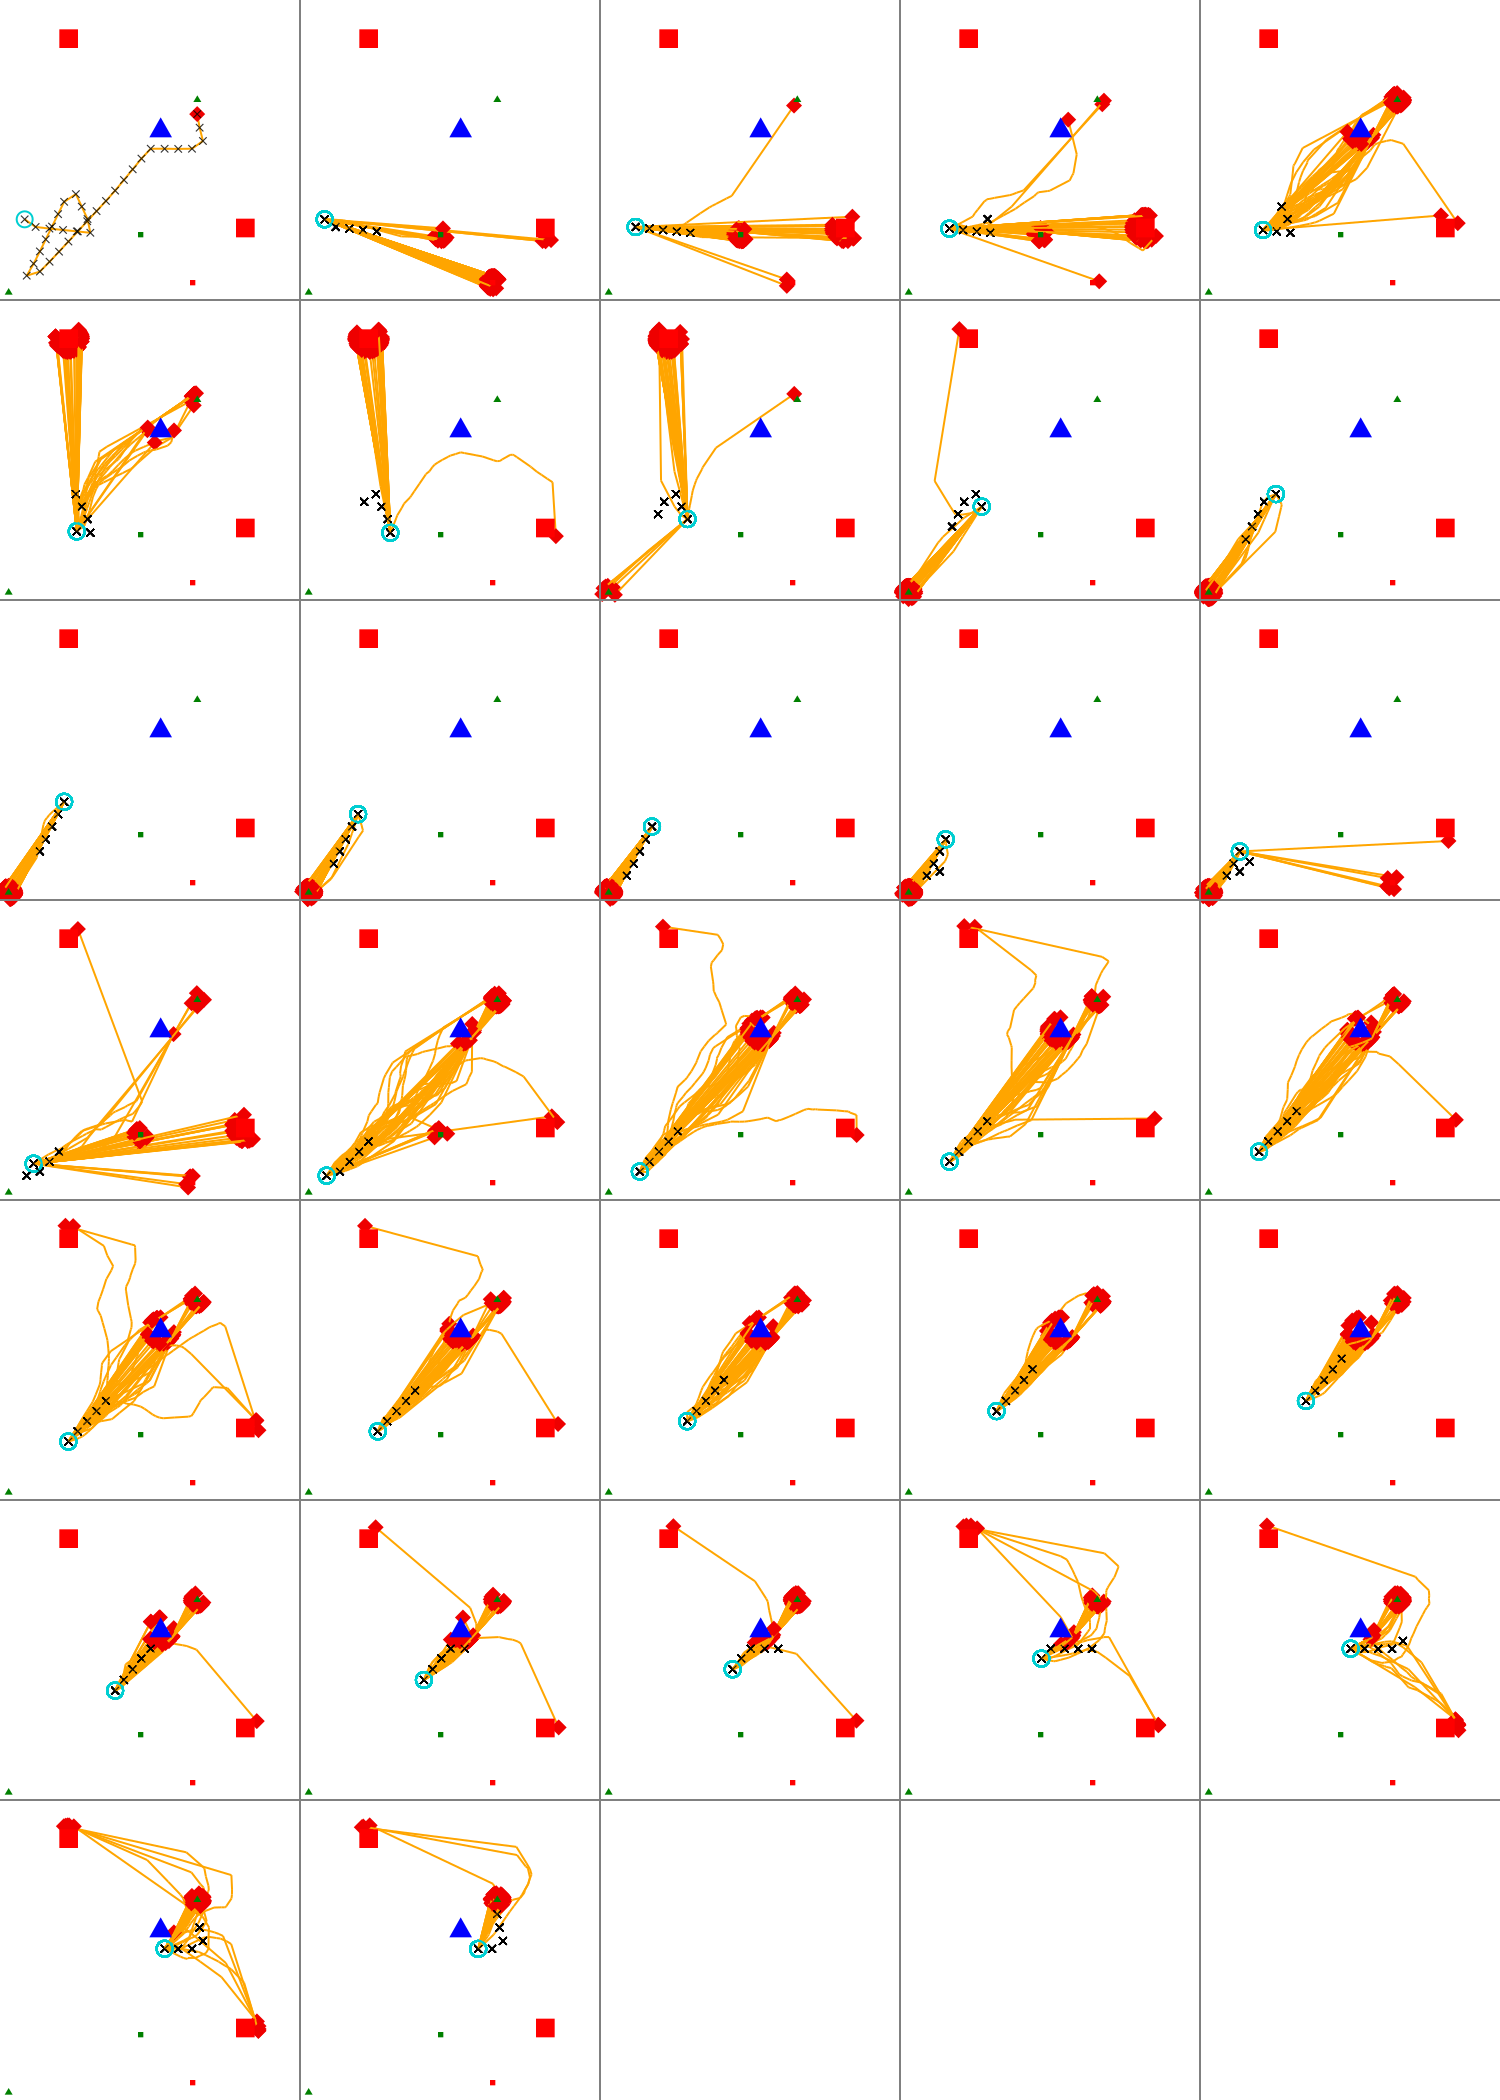

In [54]:
target_distribution = zeros(length(trajectory)-(num_ticks-1), length(scene.obstacles));
target_mean_distance = zeros(length(trajectory)-(num_ticks-1), 1);
path_complexity = zeros(length(trajectory)-(num_ticks-1), 1);
trace_score = zeros(length(trajectory)-(num_ticks-1), 1);

visualize_grid(0:length(trajectory)-(num_ticks-1), 5, 1500; separators="gray") do iter, frame
    if iter == 0
        draw_path(scene, trajectory[1], trajectory[end], trajectory, frame; markersize=8, pathopacity=1)
        draw_measurements(scene, trajectory, frame; markersize=8)
        draw_scene(scene, frame)
    else
        i = iter
        measuremene = trajectory[i:i+num_ticks-1]
        path_complexity[i,1] = 1 - path_linearity(trajectory[i:i+num_ticks-1])
        # println(measuremene)
        for i in 1:samples
            trace = do_inference(agent_args, measuremene[1], measuremene, computation_amt)
            planning_failed = Gen.get_retval(trace)[:planning_failed]
            
            if planning_failed
                trace = trace_to_dict(trace)
                draw_measurements(trace[:scene], trace[:measurements], frame; markersize=8)
                continue
            end
            
            target_distribution[iter, trace[:dest_shape]] += 1/samples
            target_mean_distance[iter, 1] += euclidean_distance_obstacle_point(scene.obstacles[trace[:dest_shape]], 
                                                                               measuremene[end][1], 
                                                                               measuremene[end][2])/samples
            
            trace_score[iter, 1] += get_score(trace)/samples
            
            trace = trace_to_dict(trace)
            draw_path(trace[:scene], trace[:start], trace[:dest], trace[:path], frame; markersize=8, pathopacity=1)
            draw_measurements(trace[:scene], trace[:measurements], frame; markersize=8)
            
        end
        draw_scene(scene, frame)
    end
    
end

In [55]:
total_variation = total_variation_distance(target_distribution);
separation = 1 .- maximum(target_distribution, dims=2);

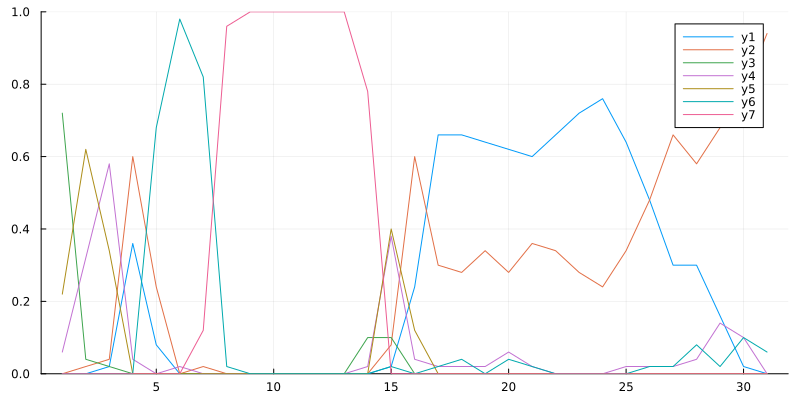

In [56]:
plot(target_distribution)
plot!(size=(800,400))
ylims!((0,1))

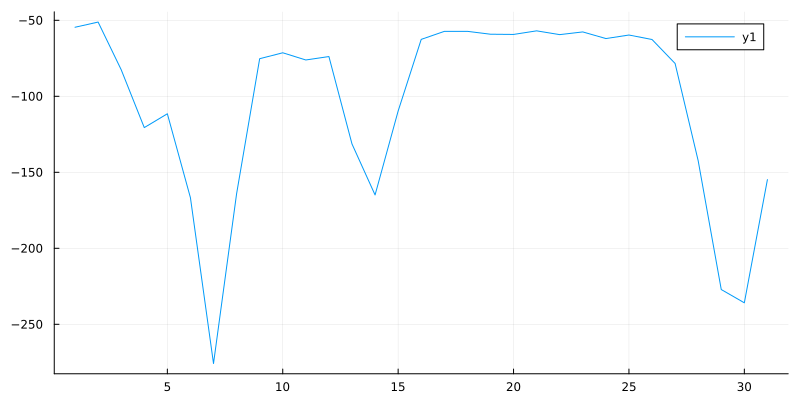

In [57]:
plot(trace_score)
plot!(size=(800,400))

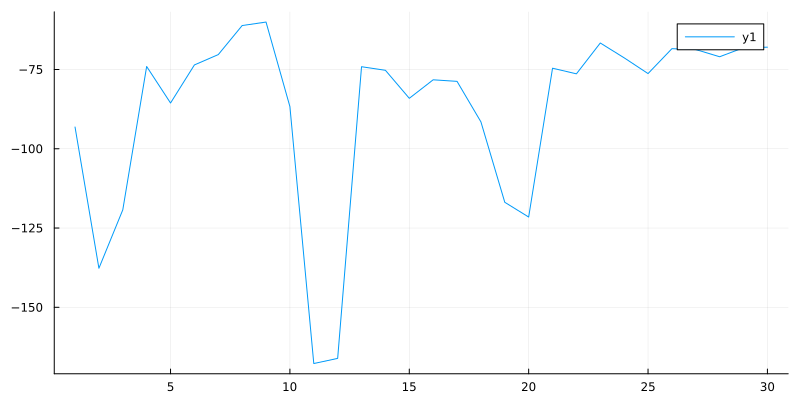

In [37]:
plot(trace_score)
plot!(size=(800,400))

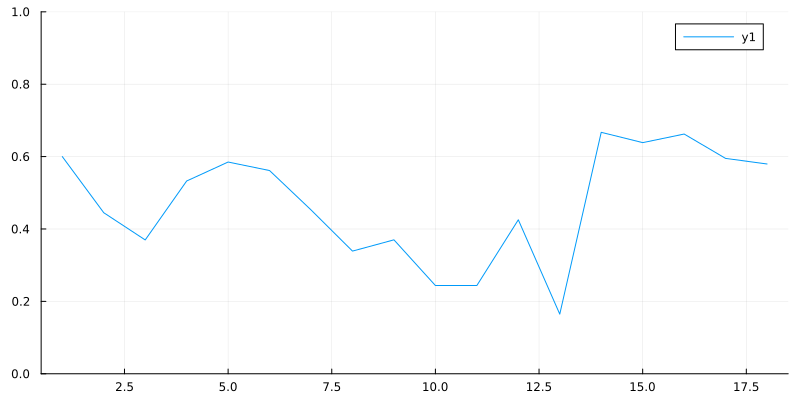

In [11]:
plot(entropy_moving_window(target_distribution, 1))
plot!(size=(800,400))
ylims!((0,1))

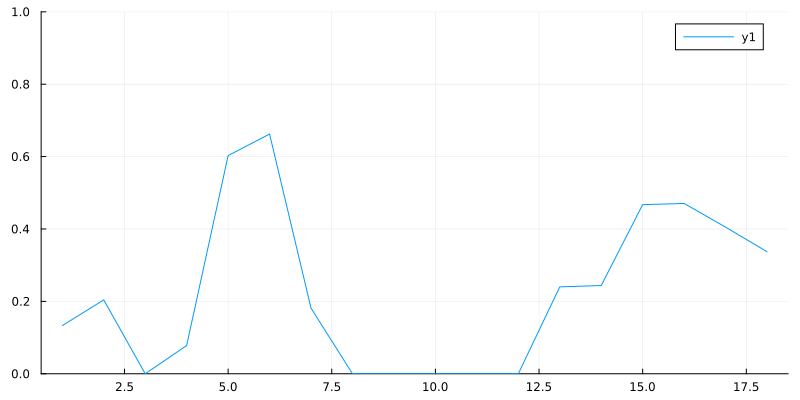

In [12]:
plot(entropy_moving_window2(target_distribution, 1))
plot!(size=(800,400))
ylims!((0,1))

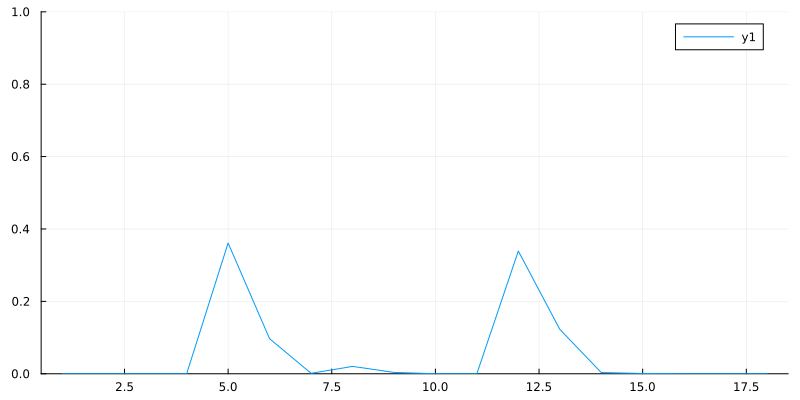

In [13]:
plot(sqrt.(path_complexity.*entropy_moving_window(target_distribution,1)))
plot!(size=(800,400))
ylims!((0,1))

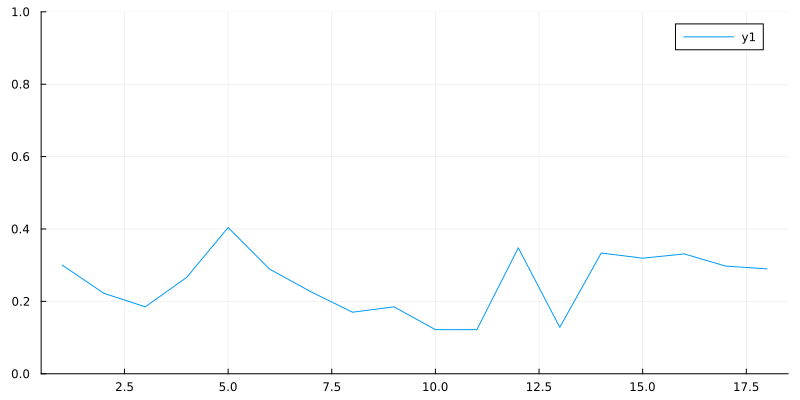

In [14]:
plot( (path_complexity + entropy_moving_window(target_distribution,1))./2 )
plot!(size=(800,400))
ylims!((0,1))

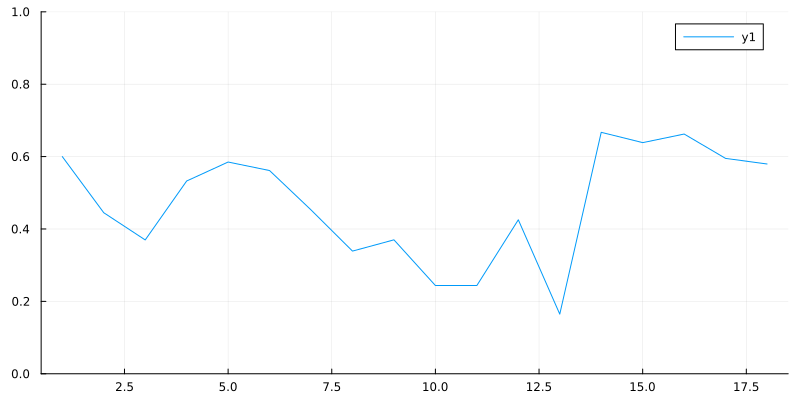

In [15]:
plot(entropy_moving_window(target_distribution,1))
plot!(size=(800,400))
ylims!((0,1))

In [16]:
minimum(clamp.(path_complexity,0,Inf))

3.390621117205228e-13

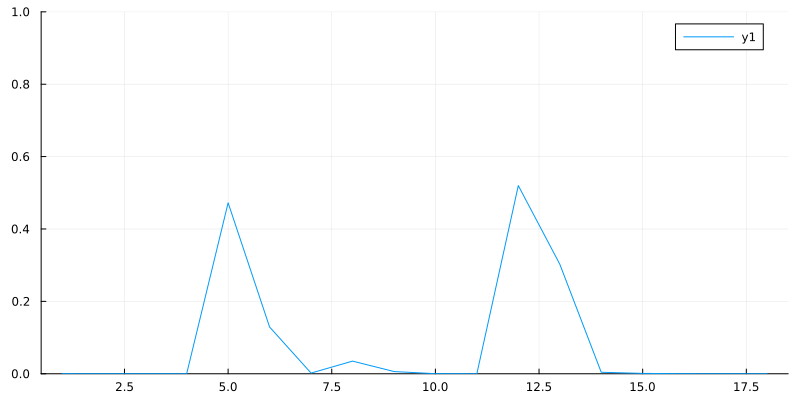

In [17]:
plot(sqrt.(path_complexity))
plot!(size=(800,400))
ylims!((0,1))

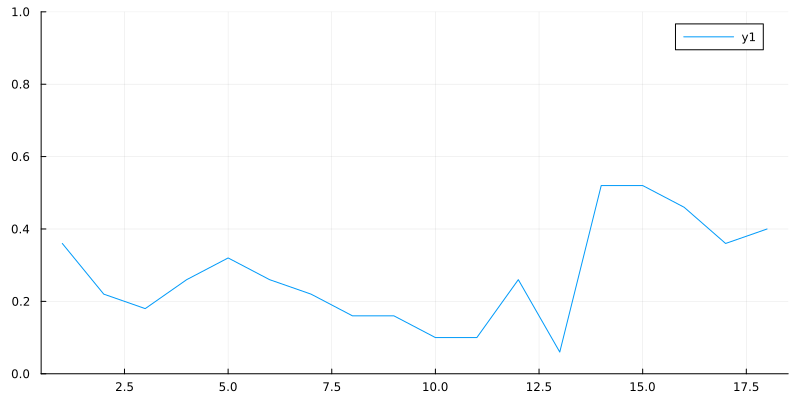

In [18]:
plot(separation)
plot!(size=(800,400))
ylims!((0,1))

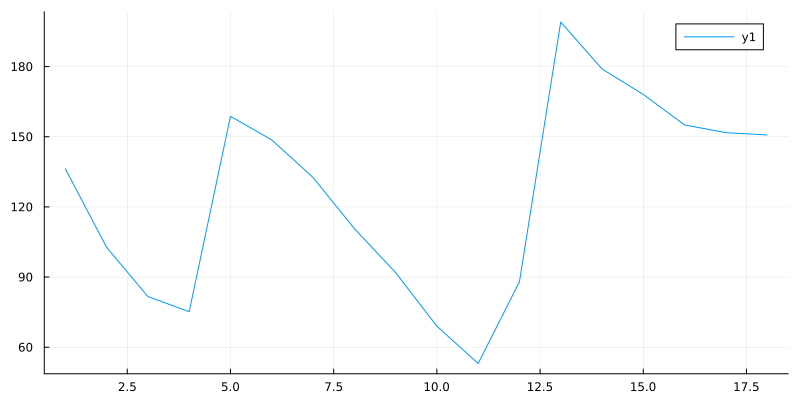

In [19]:
plot(target_mean_distance)
plot!(size=(800,400))

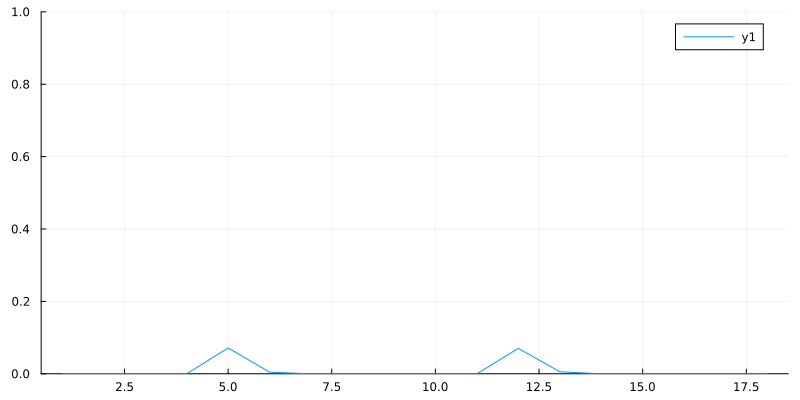

In [20]:
plot(separation.*path_complexity)
plot!(size=(800,400))
ylims!((0,1))

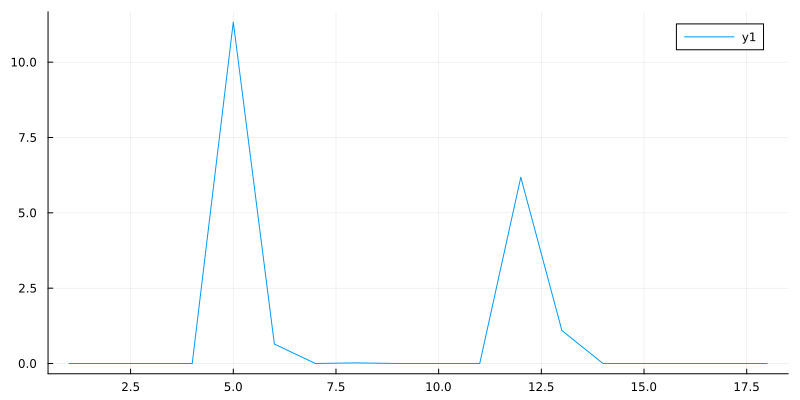

In [21]:
plot(separation.*path_complexity.*target_mean_distance)
plot!(size=(800,400))

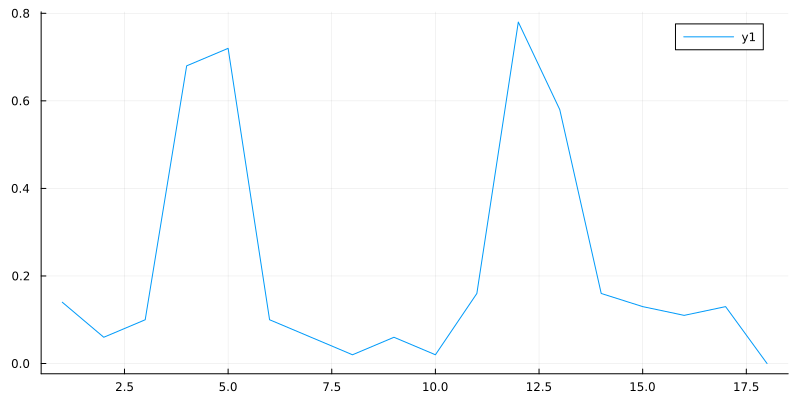

In [22]:
plot(moving_average(total_variation,1))
plot!(size=(800,400))